In [32]:
import pandas as pd

In [33]:
df_cat = pd.read_excel("SPCategories.xlsx")

In [34]:
df_cat  = df_cat.drop(['◢','System.Collections.Generic.List<string>',"spClass.ListCategory"],axis=1)
df_cat  = df_cat.rename(columns={"spClass.ListCategory": "cat_num", "Count = 52": "cat_name"})

df_cat["cat_name"] = df_cat["cat_name"].str.strip('"')
df_cat = df_cat.iloc[:-1]

df_cat.head(7) 

,cat_name
0,
1,Article
2,Audited Financial Statements
3,AUM
4,"Capital: committed, invested"
5,CCO Notes
6,Compliance - Other


In [35]:
df_cat = df_cat.drop(index=0).reset_index(drop=True)

In [36]:
len(df_cat)

51

In [37]:
df_names = pd.read_csv('data.csv', usecols=[0])
df_names.head(7)

,Name
0,PMC Q3 2024.pptx
1,Quarterly Manager Blurb - 2024.xlsx
2,GTF Exposure Snapshot - Sep 2024.xlsx
3,Janus Henderson Biotechnology Innovation Fund ...
4,2024-11-07-Documents By Last Modified Date.xlsx
5,Verition Commentary & Risk Report_September 20...
6,Saba Capital Carry Neutral Tail Fund - Risk Re...


In [38]:
df_names = df_names.fillna("")
#df_names = df_names[df_names["Name"].apply(lambda x: len(x) >= 6)]
df_names

,Name
0,PMC Q3 2024.pptx
1,Quarterly Manager Blurb - 2024.xlsx
2,GTF Exposure Snapshot - Sep 2024.xlsx
3,Janus Henderson Biotechnology Innovation Fund ...
4,2024-11-07-Documents By Last Modified Date.xlsx
...,...
588217,sharedStrings.xml
588218,styles.xml
588219,vbaProject.bin
588220,.rels


In [39]:
import pandas as pd
import numpy as np

# Assuming df_names is a single column with values [1, 2, 3]
# and df_cat is a single column with values ['a', 'b', 'c']

# Create an empty DataFrame with 'df_cat' values as column names
df_result = pd.DataFrame(np.nan, index=df_names.index, columns=df_cat.iloc[:, 0].values)

# Add df_names as the first column
df_result.insert(0, df_names.columns[0], df_names)

# View the result
#df_result = df_result.head(50000)

In [40]:
import string
import re

# List of stop words to remove
stop_words = ["or", "and", "the", "of", "to", "in", "for", "on", "at", "a", "is", "it", "by", "an"]

# Convert column names to lowercase and remove stop words
stop_words_pattern = r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b'

df_result.columns = (
    df_result.columns.str.lower()
    .str.replace(f"[{string.punctuation}]", "", regex=True)
    .str.replace(stop_words_pattern, '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)  # Replace any spaces with underscores
    .str.strip('_')  # Remove leading/trailing underscores
)

df_result

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,reference notes,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions
0,PMC Q3 2024.pptx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Quarterly Manager Blurb - 2024.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTF Exposure Snapshot - Sep 2024.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Janus Henderson Biotechnology Innovation Fund ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-11-07-Documents By Last Modified Date.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588217,sharedStrings.xml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588218,styles.xml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588219,vbaProject.bin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588220,.rels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
import numpy as np

# Ensure columns and 'name' values are lowercase
df_result.columns = df_result.columns.str.lower()
df_result['name'] = df_result['name'].str.lower()

# Iterate over each row
for idx, row in df_result.iterrows():
    name_words = row['name'].split()  # Split file name into words
    
    # Iterate over all columns except 'name'
    for column in df_result.columns:
        if column != 'name':
            # Split column name into words
            words_in_column = column.split()
            
            # Count the number of matching words between column name and file name
            overlap = sum(1 for word in words_in_column if word in name_words)
            
            # If there's at least one match, set the corresponding value in the dataframe
            if overlap > 0:
                df_result.at[idx, column] = overlap  # Assign the overlap count (1, 2, 3, etc.)

# View the result
df_result

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,reference notes,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions
0,pmc q3 2024.pptx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,quarterly manager blurb - 2024.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gtf exposure snapshot - sep 2024.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,janus henderson biotechnology innovation fund ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-11-07-documents by last modified date.xlsx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588217,sharedstrings.xml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588218,styles.xml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588219,vbaproject.bin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588220,.rels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Exclude the 'name' column and check for rows with all NaN values in other columns
nan_rows = df_result.drop(columns=['name']).isna().all(axis=1)

# Count the number of rows that are fully NaN except for the 'name' column
num_nan_rows = nan_rows.sum()

# Print the result
print(f"Number of rows with all NaN values except for 'name': {num_nan_rows}")

Number of rows with all NaN values except for 'name': 467400


In [43]:
df_result.columns

Index(['name', 'article', 'audited financial statements', 'aum',
       'capital committed invested', 'cco notes', 'compliance other',
       'compliance business continuity manual', 'conference call',
       'conference meeting notes', 'current event', 'ddq', 'due diligence',
       'employee information', 'fact sheet', 'investment memo',
       'investor breakdown', 'investor letter',
       'legal additional subscription form', 'legal articles incorporation',
       'legal form advs', 'legal initial subscription form',
       'legal lpa drafts supplements redlines',
       'legal nondisclosure agreementnda',
       'legal offering memorandumppmprospectus',
       'legal omppm drafts supplements redlines', 'legal other',
       'legal other subscription details',
       'legal partnership company agreementlpa', 'legal redemption form',
       'monthly quarterly annual update', 'offsite meeting', 'onepager',
       'onsite meeting', 'operational due diligence', 'ownership structure',


In [44]:
"""
# Create a dictionary to store the result
result_dict = {}

# Iterate through rows
for idx, row in df_result.iterrows():
    name = row['name']  # Get the name value
    name_words = set(name.split())  # Split the file name into words and use a set for faster lookup
    
    max_matches = 0
    matched_columns = []

    # Iterate through all columns except 'name'
    for column in df_result.columns:
        if column != 'name':
            # Split the column name into words
            column_words = set(column.split())
            
            # Count the number of matching words
            matches = len(name_words.intersection(column_words))
            
            # If there are more matches than the current max, reset the matched columns
            if matches > max_matches:
                max_matches = matches
                matched_columns = [column]
            # If there's a tie, add the column to the list
            elif matches == max_matches and matches > 0:
                matched_columns.append(column)

    # If there were any matches, add the best matching columns and highest score to the result_dict
    if matched_columns:
        result_dict[name] = {'columns': matched_columns, 'score': max_matches}

import random
sample_entries = random.sample(list(result_dict.items()), 10)
sample_entries 
"""

"\n# Create a dictionary to store the result\nresult_dict = {}\n\n# Iterate through rows\nfor idx, row in df_result.iterrows():\n    name = row['name']  # Get the name value\n    name_words = set(name.split())  # Split the file name into words and use a set for faster lookup\n    \n    max_matches = 0\n    matched_columns = []\n\n    # Iterate through all columns except 'name'\n    for column in df_result.columns:\n        if column != 'name':\n            # Split the column name into words\n            column_words = set(column.split())\n            \n            # Count the number of matching words\n            matches = len(name_words.intersection(column_words))\n            \n            # If there are more matches than the current max, reset the matched columns\n            if matches > max_matches:\n                max_matches = matches\n                matched_columns = [column]\n            # If there's a tie, add the column to the list\n            elif matches == max_matches 

In [45]:
df_result = df_result.fillna(0)

In [46]:
df_result

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,reference notes,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions
0,pmc q3 2024.pptx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,quarterly manager blurb - 2024.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gtf exposure snapshot - sep 2024.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,janus henderson biotechnology innovation fund ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-11-07-documents by last modified date.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588217,sharedstrings.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588218,styles.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588219,vbaproject.bin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588220,.rels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
"""
# Create the 'Unknown' column and initialize it with 0
df_result['Unknown'] = 0

# Iterate over the rows and check if the sum of the numerical values is zero
for idx, row in df_result.iterrows():
    if row.drop('name').sum() == 0:  # Exclude the 'name' column, sum the rest
        df_result.at[idx, 'Unknown'] = 1  # Set 'Unknown' to 1 if sum is zero
"""

"\n# Create the 'Unknown' column and initialize it with 0\ndf_result['Unknown'] = 0\n\n# Iterate over the rows and check if the sum of the numerical values is zero\nfor idx, row in df_result.iterrows():\n    if row.drop('name').sum() == 0:  # Exclude the 'name' column, sum the rest\n        df_result.at[idx, 'Unknown'] = 1  # Set 'Unknown' to 1 if sum is zero\n"

In [48]:
df_result

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,reference notes,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions
0,pmc q3 2024.pptx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,quarterly manager blurb - 2024.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gtf exposure snapshot - sep 2024.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,janus henderson biotechnology innovation fund ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-11-07-documents by last modified date.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588217,sharedstrings.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588218,styles.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588219,vbaproject.bin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588220,.rels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Create an empty list to store the rows
result_list = []

# Iterate through each row of df_result
for idx, row in df_result.iterrows():
    # Get the name value (row['name'])
    name = row['name']
    
    # Get the values in the columns to the right of 'name'
    values = row.iloc[1:]  # Skipping the first column ('name')

    # Find the highest value in those columns
    highest_value = values.max()

    # Store the result in the list
    result_list.append({'name': name, 'highest_value': highest_value})

# Create the final DataFrame from the list of results
highest_value_df = pd.DataFrame(result_list)

In [50]:
# Number of word matches

#        Name              Classification
# "fund due diligence" = due || diligence ==> 1
# "fund due diligence" = due && diligence ==> 2

highest_value_df.highest_value.value_counts()

highest_value
0.0    467400
1.0    111797
2.0      8551
3.0       474
Name: count, dtype: int64

In [51]:
# Total Matches
highest_value_df.highest_value.value_counts().sum()

np.int64(588222)

In [52]:
total_files = len(highest_value_df)

# Number of file names with no matches (highest_value is NaN or 0)
no_matches = len(highest_value_df[highest_value_df['highest_value'].isna() | (highest_value_df['highest_value'] == 0)])

# Calculate the percentage of file names with no matches
no_matches_percentage = (no_matches / total_files) * 100

# Output the result
print(f"Percentage of file names with no matches: {no_matches_percentage:.2f}%")

Percentage of file names with no matches: 79.46%


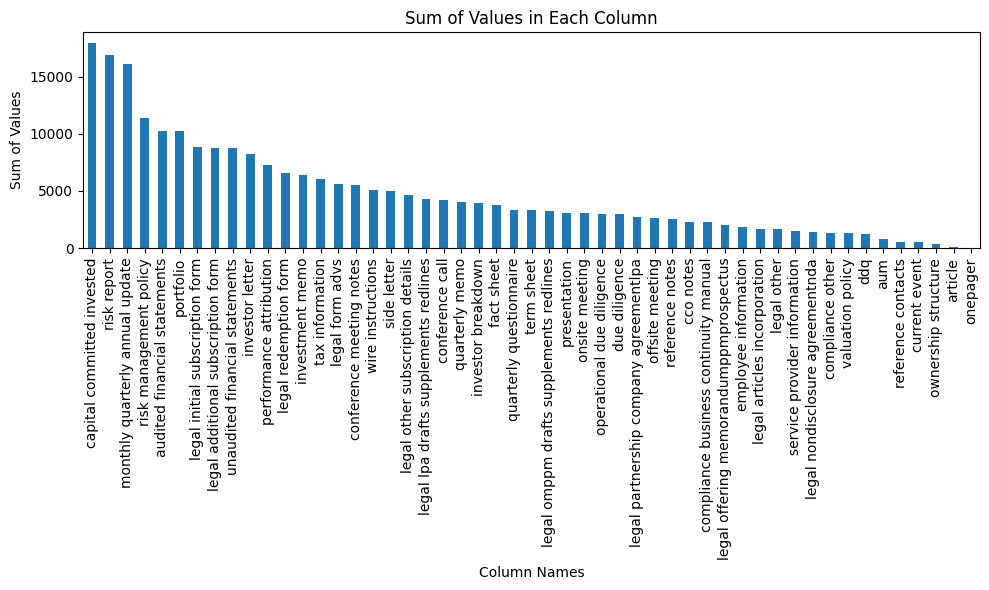

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_result is your DataFrame

# Drop the 'name' column and sum the values in each of the other columns
column_sums = df_result.drop('name', axis=1).sum()

# Sort the column sums in descending order
column_sums_sorted = column_sums.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
column_sums_sorted.plot(kind='bar')
plt.title('Sum of Values in Each Column')
plt.xlabel('Column Names')
plt.ylabel('Sum of Values')

# Rotate the x-axis labels to 90 degrees for better readability
plt.xticks(rotation=90)

# Adjust layout to ensure labels fit properly
plt.tight_layout()

# Show the plot
plt.show()

In [54]:
df_result

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,reference notes,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions
0,pmc q3 2024.pptx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,quarterly manager blurb - 2024.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,gtf exposure snapshot - sep 2024.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,janus henderson biotechnology innovation fund ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-11-07-documents by last modified date.xlsx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588217,sharedstrings.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588218,styles.xml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588219,vbaproject.bin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588220,.rels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
import pandas as pd
import re
from openpyxl import load_workbook

# List of stop words to exclude
stop_words = {'the', 'and', 'for', 'on', 'with', 'in', 'a', 'to', 'at', 'by', 'an', 'as', 'it', 'of', 'is', 'from', 'this', 'that', 'which', 'be', '-'}

# Regex pattern to match common file extensions
file_extension_pattern = r'\.(pptx|xlsx|xls|docx|doc|pdf|txt|csv|png|jpg|jpeg|gif|bmp|tiff|xml|zip|rar|7z|tar|gz|log|mp4|mp3|avi|mkv|wav|mov|json|html|htm|css|js|exe|dll|bin|py|java|c|cpp|class|sh|bat|sql|db|bak|log|tmp)$'

# Function to extract words from file names
def extract_words_from_filename(file_name):
    # Remove file extensions
    file_name = re.sub(file_extension_pattern, '', file_name, flags=re.IGNORECASE)
    # Extract words (keep hyphens and underscores as part of the word, treat them as single tokens)
    words = re.findall(r'\b[a-zA-Z\-_\']+\b', file_name.lower())  # Include hyphen and underscore
    # Filter out stop words
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Ensure the 'df_result' DataFrame exists and contains data
if 'df_result' in globals() and not df_result.empty:
    # Make a copy of df_result to ensure the original is not overwritten
    df_copy = df_result.copy()

    # Step 1: Identify rows where all values to the right of the 'name' column are zeros
    condition = df_copy.iloc[:, 1:].eq(0).all(axis=1)
    
    # Step 2: Extract words from file names where the condition is True
    df_copy['words'] = df_copy[condition]['name'].apply(extract_words_from_filename)

    # Step 3: Check if words were extracted and filter empty lists
    df_copy = df_copy[df_copy['words'].notnull() & (df_copy['words'].str.len() > 0)]

    # Step 4: Flatten the word lists into a single series
    all_words = df_copy.explode('words')

    # Step 5: Count word frequencies and keep the first occurrence (as example)
    word_counts = all_words.groupby('words').agg(
        count=('words', 'size'),
        example=('name', 'first')  # Take the first filename as the example
    ).reset_index()

    # Step 6: Add an empty 'Classification' column
    word_counts['Classification'] = ""  # Empty classification column

    # Step 7: Export the top 15 words for lengths 3 to 12 into separate sheets
    output_path = 'top_words_unclassified_words.xlsx'
    
    with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
        for length in range(3, 13):  # Word lengths from 3 to 12
            # Filter words with the specific length
            top_words = word_counts[word_counts['words'].str.len() == length].sort_values(by='count', ascending=False).head(15)
            
            # If there are no top words for this length, skip
            if top_words.empty:
                continue
            
            sheet_name = f'{length}_Char_Words'
            
            # Write to Excel in a separate sheet for each length
            top_words.to_excel(writer, sheet_name=sheet_name, index=False)
        
            # Adjust column widths for better readability
            workbook = writer.book
            sheet = workbook[sheet_name]
            sheet.column_dimensions['A'].width = 30  # 'word' column width
            sheet.column_dimensions['B'].width = 10  # 'count' column width
            sheet.column_dimensions['C'].width = 120  # 'example' column width
            sheet.column_dimensions['D'].width = 20  # 'Classification' column width

    print(f"Top words (length 3-12) with examples and classification exported to {output_path}")
else:
    print("No data to process in 'df_result' DataFrame.")


Top words (length 3-12) with examples and classification exported to top_words_unclassified_words.xlsx


In [56]:
row_sums = df_result.iloc[:, 1:].sum(axis=1)

# Filter rows where the row sum is not zero
result_df = df_result[row_sums != 0]

# Export the resulting DataFrame to a CSV file
result_df.to_csv('result_df.csv', index=False)


In [61]:
row_sums = df_result.iloc[:, 1:].sum(axis=1)

# Filter rows where the row sum is zero (excluding the 'name' column)
filtered_df = df_result[row_sums == 0]

# Randomly select 100 rows from the filtered DataFrame
random_sample = filtered_df.sample(n=140, random_state=42)  # random_state for reproducibility

# Only select the 'name' column and filter for rows that contain a period ('.')
filtered_names = random_sample['name'][random_sample['name'].str.contains(r'\.', na=False)]

# Print the filtered names column
print(filtered_names)

# Optionally, export the filtered names column to a CSV file
filtered_names.to_csv('random_files_unclassified.csv', index=False)

231137    pictet - .007 0all_holdings_by_asset_class as ...
562099                                  qab_leverage_39.pre
172929    am global core fund k-1 estimate - westview fa...
481967                       lgl - hsl - federation loa.pdf
115357                                               4.2014
                                ...                        
362141    bjl personal & foundation - ai holdings (all) ...
170661                                           doc038.xst
277868                ._buy and sell by acct appraisal.xlsx
299110         fos 6.24.19 bjl cash mgmt to first intl .pdf
329130                         bdr data 20180926 090826.bak
Name: name, Length: 112, dtype: object
